In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [22]:
data_folder = '/home/vbe/cdocs/kaggle/tps0122/data/'
train_data = pd.read_csv(data_folder + 'train.csv', index_col = 'row_id')
test_data = pd.read_csv(data_folder + 'test.csv', index_col = 'row_id')
sample_submission = pd.read_csv(data_folder + 'sample_submission.csv', index_col = 'row_id')

In [23]:
train_data.head(5)

,date,country,store,product,num_sold
row_id,,,,,
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [24]:
train_data['country'].unique()

array(['Finland', 'Norway', 'Sweden'], dtype=object)

In [25]:
train_data['store'].unique()

array(['KaggleMart', 'KaggleRama'], dtype=object)

In [26]:
train_data['product'].unique()

array(['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'], dtype=object)

In [41]:
def date_transfortm(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['week'] = df['date'].dt.week
    df['day'] = df['date'].dt.day
    df['is_weekend'] = df['date'].dt.dayofweek > 4 #True for Sunday and Saturday
    df['is_weekend'] = df['is_weekend'] * 1
    return df

In [42]:
train_data_dates = date_transfortm(train_data)

<ipython-input-41-858e537549b2>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week


In [46]:
train_data_dates.tail(5)

,date,country,store,product,num_sold,year,month,day,is_weekend,week
row_id,,,,,,,,,,
26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823,2018,12,31,0,1
26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250,2018,12,31,0,1
26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004,2018,12,31,0,1
26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441,2018,12,31,0,1
26297,2018-12-31,Sweden,KaggleRama,Kaggle Sticker,388,2018,12,31,0,1


<AxesSubplot:xlabel='month', ylabel='num_sold'>

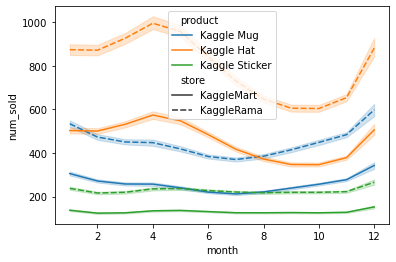

In [38]:
sns.lineplot(data=train_data_dates, x='month', y = 'num_sold', hue='product', style = 'store')

<AxesSubplot:xlabel='day', ylabel='num_sold'>

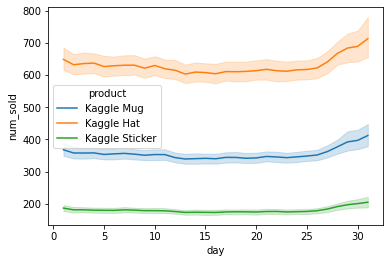

In [39]:
sns.lineplot(data=train_data_dates, x='day', y = 'num_sold', hue='product')

<AxesSubplot:xlabel='week', ylabel='num_sold'>

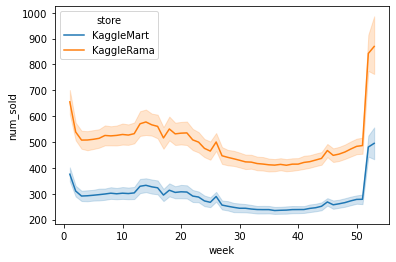

In [40]:
sns.lineplot(data=train_data_dates, x='week', y = 'num_sold', hue='store')

In [57]:
def create_dummies(df):
    dummies = pd.get_dummies(df, columns=['country', 'store', 'product'], drop_first=True)
    dummies = dummies.drop(columns=['date'])
    return dummies

In [58]:
train_data_dates_dum = create_dummies(train_data_dates)

In [65]:
y_train_data = train_data_dates_dum['num_sold']
x_train_data = train_data_dates_dum.drop(columns=['num_sold'])

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x_train_data, y_train_data, test_size=0.1, random_state=42)

In [68]:
reg = LinearRegression().fit(x_train, y_train)

In [71]:
y_predict = reg.predict(x_test)

In [72]:
mean_absolute_percentage_error(y_test, y_predict)

0.28113147936502264

In [112]:
x_test_w = x_test
x_test_w['predictions'] = y_predict
x_test_w['actual'] = y_test
x_test_w['deviation'] = x_test_w['actual'] - x_test_w['predictions']

<ipython-input-112-6f5472c99b54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_w['predictions'] = y_predict
<ipython-input-112-6f5472c99b54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_w['actual'] = y_test
<ipython-input-112-6f5472c99b54>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [113]:
x_test_w.head(2)

,year,month,day,is_weekend,week,country_Norway,country_Sweden,store_KaggleRama,product_Kaggle Mug,product_Kaggle Sticker,predictions,actual,deviation
row_id,,,,,,,,,,,,,
15429,2017,5,7,1,18,0,0,1,1,0,452.882291,397,-55.882291
14903,2017,4,7,0,14,0,1,1,0,1,245.625349,203,-42.625349


<AxesSubplot:xlabel='actual', ylabel='deviation'>

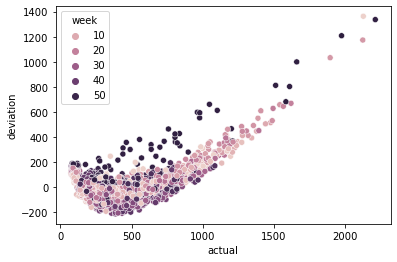

In [115]:
sns.scatterplot(data=x_test_w, x='actual', y='deviation', hue = 'week')

<AxesSubplot:xlabel='actual', ylabel='deviation'>

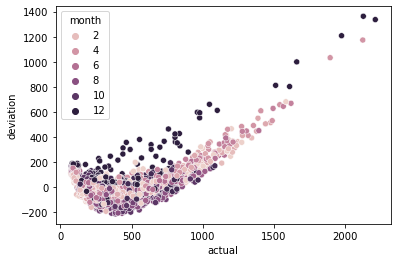

In [119]:
sns.scatterplot(data=x_test_w, x='actual', y='deviation', hue = 'month')